# Classification

## Import libraries

In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils import check_metric

import plotly.express as px

## Load dataset

With pycaret comes a lot of datasets that we can access using `get_data` function.

In [2]:
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


Let's load the *cancer* dataset that includes several features of 683 breast cancer patients. 

In [3]:
df = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [4]:
df.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Split data into a [Training set and a Test set](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In supervised machine learning, a key question regards the evaluation of models - how good are they? Just like statistics uses things like $R^2$ as a goodness-of-fit measure, the machine learning pipeline is equipped with methods of measuring a model's quality. To do this without a bias, we cannot test the model on the same data it was trained on - but on a separate test set. We therefore split the data like below.

**75% for training and 25% for testing (by default)** 

Fix a `random_state` for reproducibility: `train_test_split` splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result. If you seed your random number generator with a fixed number (say 42), your split will be always the same. 
![title](assets/Train_test_sets.jpg)

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
data = df.iloc[:,1:]
target = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=42)

In [7]:
# split data, other for model training, and other for making predictions (usually ratio is ~70/30)
#data = df.sample(frac=0.75, random_state=42).reset_index(drop=True) # take 75% of rows
#data_unseen = df.drop(data.index).reset_index(drop=True) # remaining 25%
#
#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (512, 10)
Unseen Data For Predictions: (171, 10)


## Visualizing

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# easy function for plotting features
def boxplot(data, x, y):
    plt.figure(figsize = (10,7))

    # Usual boxplot
    ax = sns.boxplot(x=x, y=y, data=data)
 
    # Add jitter with the swarmplot function.
    ax = sns.swarmplot(x=x, y=y, data=data, color="grey")

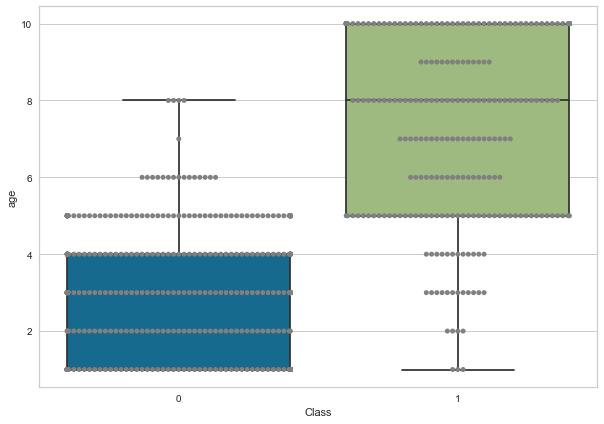

In [24]:
# plot age and class
boxplot(df, 'Class', 'age')

## Train the model

### Classification in Pycaret

`setup()` is Pycaret's main function and it needs to be run before executing any other function in pycaret. The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [18]:
# when making classification, setup() takes two mandatroy parameters: data and target
s = setup(X_train, normalize = True, target=y_train)

,Description,Value
0,Session id,6734
1,Target,Class
2,Target type,Binary
3,Original data shape,"(512, 10)"
4,Transformed data shape,"(512, 10)"
5,Transformed train set shape,"(358, 10)"
6,Transformed test set shape,"(154, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [12]:
# pycaret offers many clustering algorithms. We can test and compare them
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Pycaret runs all different ML algorhitms using default parameters. We can compare all models using `compare_models()` which puts all models in order from best to worst.

In [19]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9778,0.9941,0.9750,0.9603,0.9673,0.9505,0.9508,1.0800
et,Extra Trees Classifier,0.9778,0.9917,0.9750,0.9603,0.9673,0.9505,0.9508,0.1870
rf,Random Forest Classifier,0.9750,0.9944,0.9750,0.9532,0.9637,0.9446,0.9451,0.1940
knn,K Neighbors Classifier,0.9722,0.9845,0.9583,0.9603,0.9586,0.9377,0.9385,0.0540
ridge,Ridge Classifier,0.9722,0.0000,0.9500,0.9667,0.9580,0.9372,0.9376,0.0350
lda,Linear Discriminant Analysis,0.9722,0.9955,0.9500,0.9667,0.9580,0.9372,0.9376,0.0450
lightgbm,Light Gradient Boosting Machine,0.9721,0.9955,0.9583,0.9606,0.9578,0.9370,0.9388,0.0670
gbc,Gradient Boosting Classifier,0.9692,0.9955,0.9583,0.9519,0.9547,0.9314,0.9319,0.0950
svm,SVM - Linear Kernel,0.9667,0.0000,0.9500,0.9524,0.9503,0.9252,0.9263,0.0360
ada,Ada Boost Classifier,0.9667,0.9951,0.9417,0.9600,0.9496,0.9247,0.9261,0.1070


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

This gives us lots of metrics we can use to evaluate the results:


**Accuracy** = $ \frac{Correctly\:predicted}{Total\:samples}$  <br>
It's simple and informative but doesn't give us the whole picture since sometimes e.g. false negative predictions should be minimized. <br><br>

**Precision** = $ \frac{True\:positive}{Total\:predicted\:positive}$ <br>
Precision is a measure to determine, how precise model's positive predictions are. If model is trying to predict spam-emails (1), low precision means that rate of false positives is high i.e. lots of valid emails (0) are classified as spam.<br> <br>

**Recall** = $ \frac{True\:positive}{Total\:actually\:positive}$ <br>
In other words how many actual positives are classified correctly. Using the same example, spam emails leak into your inbox as normal emails if recall is low. <br><br>

**F1** = $ 2* \frac{Precision*Recall}{Precision+Recall}$ <br>
F1 score tells the balance between precision and recall. It's similar to accuracy but takes false positives and negatives into account, making it better metric if false predictions are significant. In addition if class distribution is uneven (e.g lots of negatives and only few positives), model may predict all negative, making accuracy high but F1-score low.


<img src="./assets/precisionrecall.png" width="400" height="500">

Let's make logistic regression model using 20 fold stratified cross validation.

In [20]:
lr = create_model('lr', fold = 20,  round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.944,0.986,1.000,0.857,0.923,0.880,0.886
1,0.944,1.000,0.833,1.000,0.909,0.870,0.877
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000
4,0.889,0.958,0.833,0.833,0.833,0.750,0.750
5,1.000,1.000,1.000,1.000,1.000,1.000,1.000
6,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000
8,0.944,0.986,1.000,0.857,0.923,0.880,0.886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

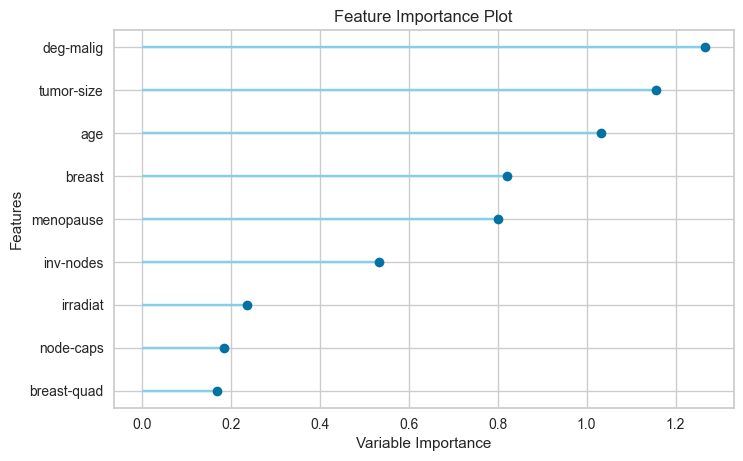

In [21]:
plot_model(lr, plot='feature')

Exercise 1. What is the most important feature? Make a plot using previously defined function boxplot and plot that feature.

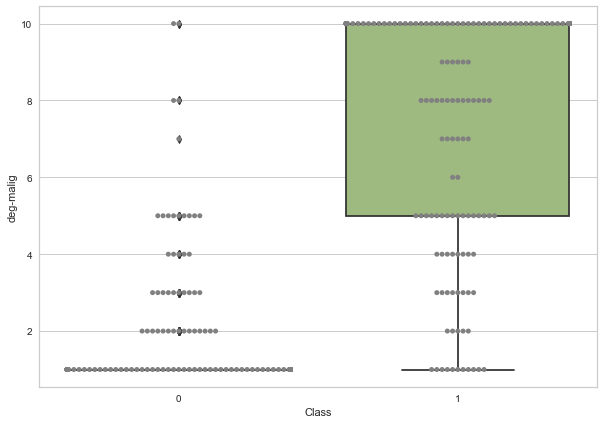

In [25]:
%%writefile solutions/pyc_1.py

boxplot(X_train, y_train, 'deg-malig')

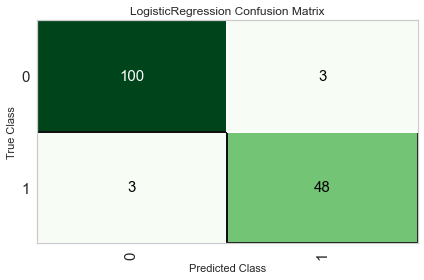

In [22]:
plot_model(lr, plot = 'confusion_matrix')

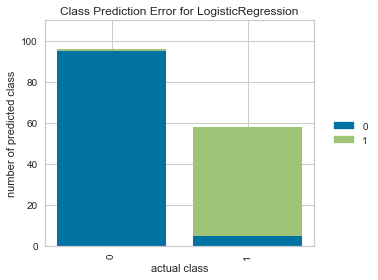

In [16]:
plot_model(lr, plot = 'error')

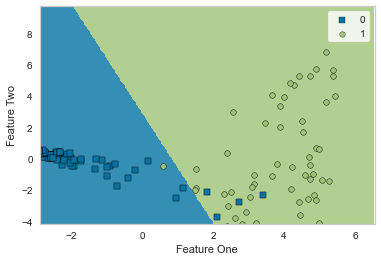

In [20]:
plot_model(lr, plot = 'boundary')

## Predictions

Now we can use the test data `data_unseen` and try to classify them with our trained model. For this we use pycaret's `predict_model()` function.

In [17]:
predictions = predict_model(lr, data=data_unseen) # pass the model and test-data as parameters
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9942,1.0000,1.0000,0.9744,0.9870,0.9832,0.9834


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Label,Score
0,0,4,1,1,1,2,1,3,1,1,0,0.9938
1,0,6,1,3,2,2,1,1,1,1,0,0.9702
2,0,4,1,1,1,1,1,2,1,1,0,0.9945
3,1,7,4,4,3,4,10,6,9,1,1,0.9593
4,0,4,2,2,1,2,1,2,1,1,0,0.9840
